In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotlt.tool s as tls

import os
plt.rcParams['figure.figsize'] = [10,5]

## Parsing Bro Conn Logs.
This section involves the parsing of Bro Conn logs into a suitable Pandas' DataFrame.

| Field  | Desc                          | Type  | 
|--------|-------------------------------|-------|
| ts     | Unix Timestamp of connection  | datetime |
| uid    |                               |

#fields	ts	uid	id.orig_h	id.orig_p	id.resp_h	id.resp_p	proto	service	duration	orig_bytes	resp_bytes	conn_state	local_orig	missed_bytes	history	orig_pkts	orig_ip_bytes	resp_pkts	resp_ip_bytes	tunnel_parents

In [2]:
def parseBro(file):
    
    df = pd.read_csv(file, delimiter='\t', skiprows=[0,1,2,3,4,5,6], skipfooter=1, engine='python')
    
    df.columns = ['ts','uid','id.orig_h','id.orig_p','id.resp_h','id.resp_p','proto','service','duration','orig_bytes','resp_bytes','conn_state',
                  'local_orig','missed_bytes','history','orig_pkts','orig_ip_bytes','resp_pkts','resp_ip_bytes','tunnel_parents','delete']
    
    # Typecasting columns
    df['ts'] = pd.to_datetime(df['ts'],unit='s')
    
    return df

def generateDF(files):
    
    df = pd.DataFrame()
    
    for file in files:

        df = pd.concat([df, parseBro('./datasets/a/' + str(file) + str('/conn.log'))])
        
    return df


## Ingest Conn Logs

In [28]:
fileList = os.listdir(path='./datasets/a/')[40:100]

df = generateDF(fileList)

df = df[['ts', 'id.orig_h', 'id.resp_h', 'orig_ip_bytes', 'resp_ip_bytes']]

df.head()

,ts,id.orig_h,id.resp_h,orig_ip_bytes,resp_ip_bytes
0,2013-11-16 20:05:56.688096046,192.168.6.10,23.79.175.139,88,40
1,2013-11-16 20:05:55.560266972,192.168.6.10,108.59.13.146,590,4491
2,2013-11-16 20:05:56.009582996,192.168.6.10,108.59.13.146,572,576
3,2013-11-16 20:05:57.058163166,192.168.6.10,206.165.250.96,912,2062
4,2013-11-16 20:05:57.288841009,192.168.6.10,206.165.250.96,496,420


## Calculating PCR Value

In [29]:
df = df.groupby('id.orig_h').sum()

df['PCR'] = (df['orig_ip_bytes'] - df['resp_ip_bytes'])/(df['orig_ip_bytes'] + df['resp_ip_bytes'])

df.head()

,orig_ip_bytes,resp_ip_bytes,PCR
id.orig_h,,,
0.0.0.0,40920,0,1.0
1.162.187.156,144,0,1.0
106.66.101.252,56,0,1.0
108.61.94.170,68,0,1.0
109.61.1.35,56,0,1.0


## Plotting Timeseries
Plots the timeseries vs PCR values to visually inspect for trends.

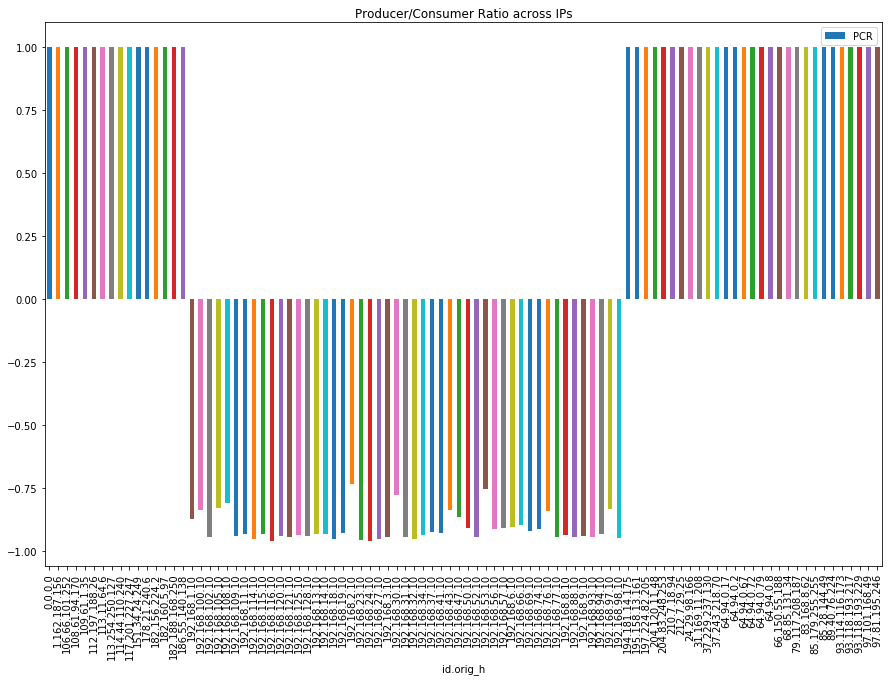

In [30]:
df.plot.bar(y='PCR', figsize=(15,10), title="Producer/Consumer Ratio across IPs")